In [2]:
import pandas as pd
import numpy as np
import json
import math
import sys



In [4]:
man_shoes = pd.read_csv("Datafiniti_Mens_Shoe_Prices.csv", error_bad_lines=False)

b'Skipping line 251: expected 48 fields, saw 49\nSkipping line 444: expected 48 fields, saw 50\nSkipping line 847: expected 48 fields, saw 49\nSkipping line 848: expected 48 fields, saw 49\nSkipping line 1018: expected 48 fields, saw 49\nSkipping line 1575: expected 48 fields, saw 51\nSkipping line 2133: expected 48 fields, saw 49\nSkipping line 2922: expected 48 fields, saw 51\nSkipping line 3777: expected 48 fields, saw 51\nSkipping line 4057: expected 48 fields, saw 49\nSkipping line 4239: expected 48 fields, saw 49\nSkipping line 4240: expected 48 fields, saw 49\nSkipping line 4384: expected 48 fields, saw 49\nSkipping line 4385: expected 48 fields, saw 49\nSkipping line 5388: expected 48 fields, saw 49\nSkipping line 5480: expected 48 fields, saw 49\nSkipping line 5481: expected 48 fields, saw 49\nSkipping line 5907: expected 48 fields, saw 50\nSkipping line 5908: expected 48 fields, saw 50\nSkipping line 6600: expected 48 fields, saw 49\nSkipping line 6601: expected 48 fields, sa

In [31]:
def extract_averge_review(reviews):
    try:
        if (type(reviews) == float):
            return None
        
        if (type(reviews) != str):
            #print( f"WARN not a string but a {type(reviews)} {reviews}" )
            return None
        
        reviews = reviews.replace("\\\\", "\\")
        kvs = json.loads(reviews)
        ratings = []
        for kv in kvs:
            if("rating" in kv):
                #print( f"\n\n{kv}" )
                ratings.append( float( kv["rating"] ) )
                
        #print( f"\n\n{ratings}" )
        
        # questo blocco è per fare qualcosa di utile con i voti di un prodotto.
        # ad esempio in questo caso viene calcolata la media delle recensioni
        if len(ratings) == 0:
            return None
        else:
            total = 0.0
            for r in ratings:
                total = total + r
            avg = total / len(ratings)
            return avg        
                
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        #print( f"WARN '{err_type}' '{err_value}' parsing {reviews}" )
        return None


def extract_material(features_json):
    # [{"key":"Material","value":["Suede"]},{"key":"Gender","value":["Men"]},{"key":"Color","value":["Beige"]},{"key":"Model","value":["M254TNN"]},{"key":"Manufacturer Part Number","value":["M254TNN"]},{"key":"Brand","value":["New Balance Numeric"]},{"key":"Age Group","value":["Adult"]}]    
    try:
        if (type(features_json) == float):
            return None
        
        if (type(features_json) != str):
            print( f"WARN not a string but a {type(features_json)} {features_json}" )
            return None
        
        features_json = features_json.replace("\\\\", "\\")
        kvs = json.loads(features_json)
        for kv in kvs:
            if(kv["key"] == "Material"):
                return kv["value"][0]
            
        return None
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        print( f"WARN '{err_type}' '{err_value}' parsing {features_json}" )
        return None
    
def extract_age_group(features_json):
    try:
        if (type(features_json) == float):
            return None
        
        if (type(features_json) != str):
            print( f"WARN not a string but a {type(features_json)} {features_json}" )
            return None
        
        features_json = features_json.replace("\\\\", "\\")
        kvs = json.loads(features_json)
        for kv in kvs:
            if(kv["key"] == "Age Group"):
                return kv["value"][0]
        return None
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        print( f"WARN '{err_type}' '{err_value}' parsing {features_json}" )
        return None    

    
     

ds_man_ridotto = pd.DataFrame()

ds_man_ridotto["brand"] = man_shoes["brand"]
ds_man_ridotto["categorie"] = man_shoes["categories"]
ds_man_ridotto["averge_review"] = man_shoes["reviews"].apply( extract_averge_review )
ds_man_ridotto["prices.currency"] = man_shoes["prices.currency"]
ds_man_ridotto["colore"] = man_shoes["colors"]
ds_man_ridotto["size"] = man_shoes["sizes"]   
ds_man_ridotto["age_group"] = man_shoes["features"].apply( extract_age_group )
ds_man_ridotto["material"] = man_shoes["features"].apply( extract_material )


ds_man_ridotto 


,brand,categorie,averge_review,prices.currency,colore,size,age_group,material
0,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,USD,NaN,NaN,None,None
1,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,USD,NaN,NaN,None,None
2,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,USD,NaN,NaN,None,None
3,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,USD,NaN,NaN,None,None
4,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,USD,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...
19310,"Xray, XRay","Clothing, Shoes & Accessories,Men's Shoes,Boots",NaN,USD,Black,12,None,None
19311,Fila,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,USD,NaN,NaN,None,None
19312,Seek Optics,"Women's Sunglasses,Sunglasses,Bags & Accessori...",NaN,USD,NaN,NaN,None,None
19313,Seek Optics,"Women's Sunglasses,Sunglasses,Bags & Accessori...",NaN,USD,NaN,NaN,None,None


In [32]:
ds_man_ridotto_2 = ds_man_ridotto[ds_man_ridotto["averge_review"].isnull()==False]

ds_man_ridotto_2

,brand,categorie,averge_review,prices.currency,colore,size,age_group,material
119,Fruit of the Loom,"All Men's Clothing,Men's Clothing,Men's Socks,...",3.500000,USD,NaN,NaN,None,Cotton blend
249,The Original Muck Boot Company,"Men's Boots,Shoes,Clothing, Shoes & Jewelry,Me...",4.600000,USD,Brown,"10,7,6,5,15,9,8,13,14,11,12",None,None
250,The Original Muck Boot Company,"Men's Boots,Shoes,Clothing, Shoes & Jewelry,Me...",4.600000,USD,Brown,"10,7,6,5,15,9,8,13,14,11,12",None,None
251,The Original Muck Boot Company,"Men's Boots,Shoes,Clothing, Shoes & Jewelry,Me...",4.600000,USD,Brown,"10,7,6,5,15,9,8,13,14,11,12",None,None
274,Carrera,"Sunglasses,Accessories,Men,Contemporary & Desi...",4.090909,USD,"Matte Black,Matte Ruthenium,Light Gold,Semi Me...",NaN,None,None
...,...,...,...,...,...,...,...,...
18629,Swiss Legend,"Watches,Clothing, Shoes & Jewelry,Men,Wrist Wa...",3.000000,CAD,NaN,NaN,None,None
18630,Swiss Legend,"Watches,Clothing, Shoes & Jewelry,Men,Wrist Wa...",3.000000,EUR,NaN,NaN,None,None
19002,Superior Glove Works,"Men's Work Gloves,Power Tools,Safety Apparel,W...",4.000000,USD,NaN,NaN,None,Stainless Steel
19003,Superior Glove Works,"Men's Work Gloves,Power Tools,Safety Apparel,W...",4.000000,CAD,NaN,NaN,None,Stainless Steel


In [33]:
ds_man_ridotto_2['medium.price']=(ds_man_ridotto_2['prices.amountMin']+ds_man_ridotto_2['prices.amountMax'])/2

KeyError: 'prices.amountMin'

In [34]:
ds_man_ridotto_2

,brand,categorie,averge_review,prices.currency,colore,size,age_group,material
119,Fruit of the Loom,"All Men's Clothing,Men's Clothing,Men's Socks,...",3.500000,USD,NaN,NaN,None,Cotton blend
249,The Original Muck Boot Company,"Men's Boots,Shoes,Clothing, Shoes & Jewelry,Me...",4.600000,USD,Brown,"10,7,6,5,15,9,8,13,14,11,12",None,None
250,The Original Muck Boot Company,"Men's Boots,Shoes,Clothing, Shoes & Jewelry,Me...",4.600000,USD,Brown,"10,7,6,5,15,9,8,13,14,11,12",None,None
251,The Original Muck Boot Company,"Men's Boots,Shoes,Clothing, Shoes & Jewelry,Me...",4.600000,USD,Brown,"10,7,6,5,15,9,8,13,14,11,12",None,None
274,Carrera,"Sunglasses,Accessories,Men,Contemporary & Desi...",4.090909,USD,"Matte Black,Matte Ruthenium,Light Gold,Semi Me...",NaN,None,None
...,...,...,...,...,...,...,...,...
18629,Swiss Legend,"Watches,Clothing, Shoes & Jewelry,Men,Wrist Wa...",3.000000,CAD,NaN,NaN,None,None
18630,Swiss Legend,"Watches,Clothing, Shoes & Jewelry,Men,Wrist Wa...",3.000000,EUR,NaN,NaN,None,None
19002,Superior Glove Works,"Men's Work Gloves,Power Tools,Safety Apparel,W...",4.000000,USD,NaN,NaN,None,Stainless Steel
19003,Superior Glove Works,"Men's Work Gloves,Power Tools,Safety Apparel,W...",4.000000,CAD,NaN,NaN,None,Stainless Steel


In [35]:
ds_man_ridotto_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 119 to 19004
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            890 non-null    object 
 1   categorie        895 non-null    object 
 2   averge_review    895 non-null    float64
 3   prices.currency  895 non-null    object 
 4   colore           636 non-null    object 
 5   size             424 non-null    object 
 6   age_group        95 non-null     object 
 7   material         176 non-null    object 
dtypes: float64(1), object(7)
memory usage: 62.9+ KB


In [36]:
cat_def={'Casual', 'Athletic & Outdoor Shoes','Sporting Goods','Prada Sport',"Outdoor Sports", "Sports & Outdoors", 'Tennis', 'Running Shoes', 'Sneakers & Athletic Shoes', 'Team Sports', "Men's Casual Shoes", 'Basketball', 'Athletic', 'Sports & Outdoors', 'Contemporary & Designer', "Men's Outerwear", 'Outdoor', 'Walking Shoes', 'Fashion Sneakers', 'Tennis', 'Sneakers & Athletic Shoes', 'Nike Sneakers', "Men's Sneakers & Athletic Shoes", 'The Sneaker Project', 'Sneakers & Athletic', 'Sneakers'}

In [37]:
def y(x):
    cat_def_man_ridotto_2={'Casual', 'Athletic & Outdoor Shoes','Sporting Goods','Prada Sport',"Outdoor Sports", "Sports & Outdoors", 'Tennis', 'Running Shoes', 'Sneakers & Athletic Shoes', 'Team Sports', "Men's Casual Shoes", 'Basketball', 'Athletic', 'Sports & Outdoors', 'Contemporary & Designer', "Men's Outerwear", 'Outdoor', 'Walking Shoes', 'Fashion Sneakers', 'Tennis', 'Sneakers & Athletic Shoes', 'Nike Sneakers', "Men's Sneakers & Athletic Shoes", 'The Sneaker Project', 'Sneakers & Athletic', 'Sneakers'}
    p=''
    for i in cat_def_man_ridotto_2:
        if i in x:
            p=p+i+', '
    return p[:-2]

def g(x):
    for i in x:
        return y(x)
    
ds_man_ridotto_2['Categorie_DEF']= ds_man_ridotto_2['categorie'].apply(g)
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['Categorie_DEF']!='']

ds_man_ridotto_2

<ipython-input-37-e695cac9663b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_man_ridotto_2['Categorie_DEF']= ds_man_ridotto_2['categorie'].apply(g)


,brand,categorie,averge_review,prices.currency,colore,size,age_group,material,Categorie_DEF
274,Carrera,"Sunglasses,Accessories,Men,Contemporary & Desi...",4.090909,USD,"Matte Black,Matte Ruthenium,Light Gold,Semi Me...",NaN,None,None,Contemporary & Designer
275,Carrera,"Sunglasses,Accessories,Men,Contemporary & Desi...",4.090909,USD,"Matte Black,Matte Ruthenium,Light Gold,Semi Me...",NaN,None,None,Contemporary & Designer
276,Carrera,"Sunglasses,Accessories,Men,Contemporary & Desi...",4.090909,USD,"Matte Black,Matte Ruthenium,Light Gold,Semi Me...",NaN,None,None,Contemporary & Designer
277,Carrera,"Sunglasses,Accessories,Men,Contemporary & Desi...",4.090909,USD,"Matte Black,Matte Ruthenium,Light Gold,Semi Me...",NaN,None,None,Contemporary & Designer
278,Carrera,"Sunglasses,Accessories,Men,Contemporary & Desi...",4.090909,USD,"Matte Black,Matte Ruthenium,Light Gold,Semi Me...",NaN,None,None,Contemporary & Designer
...,...,...,...,...,...,...,...,...,...
18611,DVS,"Athletic,Men,Skateboarding,Women,Shoes,Clothin...",4.625000,USD,"Black Nubuck Deegan,Black Canvas,Black,BlackWh...",NaN,None,None,Athletic
18612,DVS,"Athletic,Men,Skateboarding,Women,Shoes,Clothin...",4.625000,USD,"Black Nubuck Deegan,Black Canvas,Black,BlackWh...",NaN,None,None,Athletic
18613,DVS,"Athletic,Men,Skateboarding,Women,Shoes,Clothin...",4.625000,USD,"Black Nubuck Deegan,Black Canvas,Black,BlackWh...",NaN,None,None,Athletic
18614,DVS,"Athletic,Men,Skateboarding,Women,Shoes,Clothin...",4.625000,USD,"Black Nubuck Deegan,Black Canvas,Black,BlackWh...",NaN,None,None,Athletic


In [38]:
ds_man_ridotto_2["colore"].value_counts()

WhiteWhite Mesh,BlackBlack Mesh                                                                                                                               66
Blackredwhite                                                                                                                                                 24
Matte Black,Matte Ruthenium,Light Gold,Semi Metallic Brown                                                                                                    23
Black,Port RoyalePort,Dalmatians White,Burgundy,Rabbit HoleBlack,beige bleu,Red,DalmatiansWhite,BlackTrue White,Disney DalmatiansWhite,Denim CL Black         11
Frame color Black,Lens color Grey                                                                                                                             11
Black                                                                                                                                                         10
Black Nubuck Deegan,Black Canvas,B

In [56]:
ds_man_ridotto_3=ds_man_ridotto_2.groupby('colore').mean().sort_values(by=['averge_review'], ascending=False)

ds_man_ridotto_3

,averge_review
colore,
Gray,5.000000
SilverBlue,5.000000
Denim,4.750000
Whitenavy,4.500000
Black,4.040000
Brown,3.758333
"White,Black",2.000000


In [47]:
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Frame color Black,Lens color Grey']

In [55]:
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Dark Carbon Green,Dark Carbon Brown']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Natural,Black,Grey']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Denim BlueGrey,Blue']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Black,Beige']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='SPORT BLUEBLACK-COOL GREY,BlackOrangeGrey,Sport BlueBlackCool Grey,Wolf GreyInfrared ,Silver,BlackGrayPink,GreyWhite,blkelectric orange-wolf grypink,Black']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='WhiteWhite Mesh,BlackBlack Mesh']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='MarineSilver Grey']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='White Leather']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Matte Black,Matte Ruthenium,Light Gold,Semi Metallic Brown']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='White,Brown Suede']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Blue LagoonBlack-Brave Blue,Bright Crimson,BlackWhiteDark Grey,Wolf GreyBlackRacer BlueSl,BLACKWHITE-DARK GREY,Grey']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='RedWhite canvas,GreyWhite,BlackWhite Canvas']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='White All Leather']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Silver I,Silver,Gold,Gold I']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Dark Wash']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Black Deertan']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='ObsidianTm RdWhiteMtllc Gld,Red,Medium Grey White']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Black Leather']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Metallic Red Bronze,Black,White,Red BronzeGreen GlowBlack']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='BlackLead']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Indigo']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Falcon,CanteenBrown']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Dark Chocolate,BlackDark Grey']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Gym RedWhiteBlack,Team CrimsonWhite-Black,Navy,Midnight NavyWhite-Black,BlackCool GreyWhite,Midnight NavyWhiteBlack,Midnight Navy']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='White,Black,Multi-color']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Black,Port RoyalePort,Dalmatians White,Burgundy,Rabbit HoleBlack,beige bleu,Red,DalmatiansWhite,BlackTrue White,Disney DalmatiansWhite,Denim CL Black']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='WhiteBlackRed,WhiteGrayNavy,White,Black']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Black Nubuck Deegan,Black Canvas,Black,BlackWhite Nubuck,Black Chambray,Grey Twil']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='BlackRed,BlackBlue Steel']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Black Nubuck Deegan,Black Canvas,Black,BlackWhite Nubuck,Black Chambray,Grey Twill']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Blackredwhite']
ds_man_ridotto_2=ds_man_ridotto_2[ds_man_ridotto_2['colore']!='Bone']





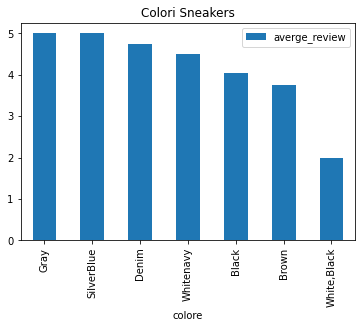

In [57]:
import matplotlib.pyplot as plot
ds_man_ridotto_3.plot.bar(title="Colori Sneakers")

plot.show(block=True)